Project Title: Superstore Sales Analysis and Visualization


1. Introduction
This project analyzes the sales and profit data from a Superstore dataset. 
The analysis includes exploring key metrics, time series trends, customer segmentation, and product-level performance.

Import libraries

In [10]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Suppress the FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

2. Data Loading and Cleaning

Loading Data: The dataset was loaded using pandas.

In [4]:
file_path = 'Sample - Superstore (3).xlsx'
data = pd.read_excel(file_path)
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


Data Cleaning: The data was cleaned by handling missing values, converting date columns, and replacing infinite values.

In [5]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [6]:
data.dropna(inplace=True)
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [7]:
#Convert 'Order Date' and 'Ship Date' columns to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


3. Exploratory Data Analysis (EDA)

Key Metrics Analysis

1-Sales by Category

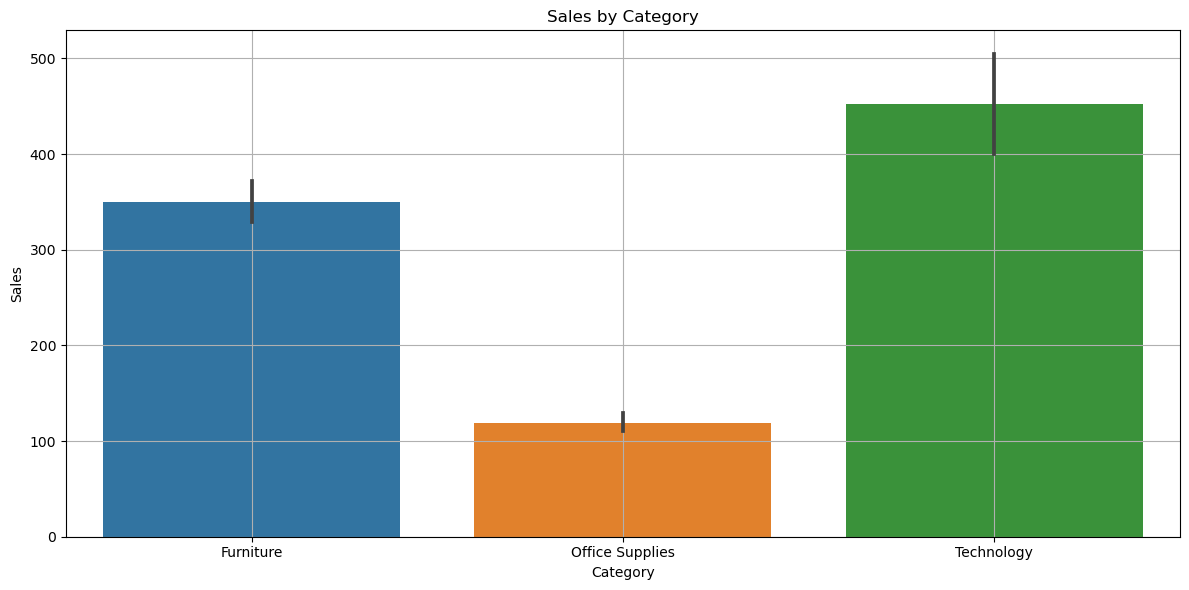

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Category', y='Sales')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

2-Sales vs Profit

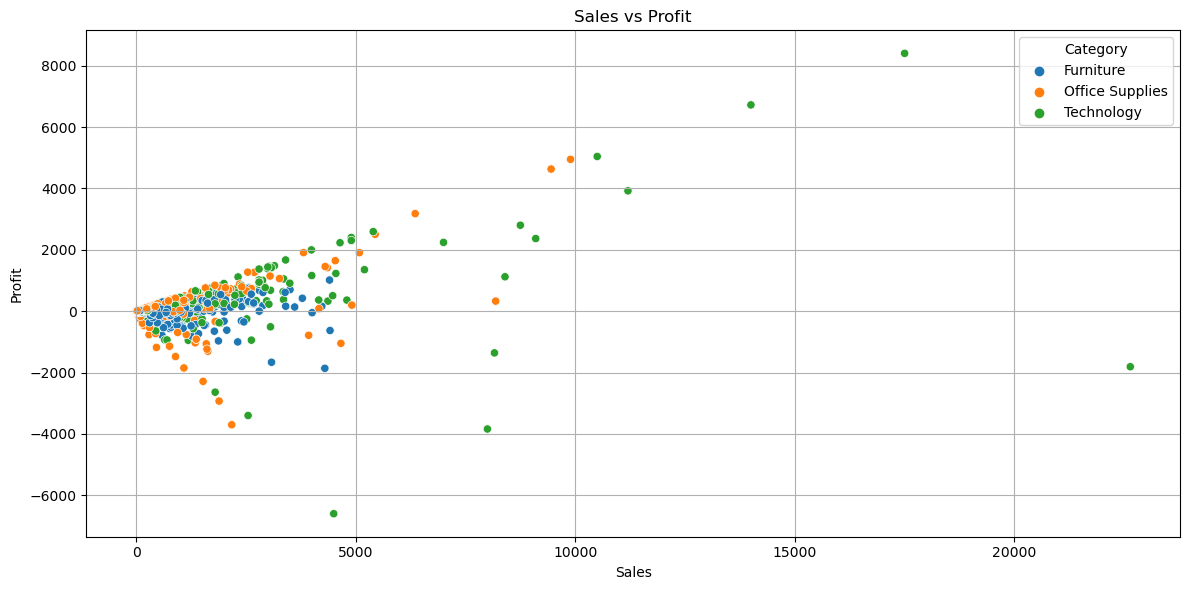

In [13]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Sales', y='Profit', hue='Category')
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

Sales and Profit by Category: Bar plots were used to visualize the total sales and profit across different product categories.


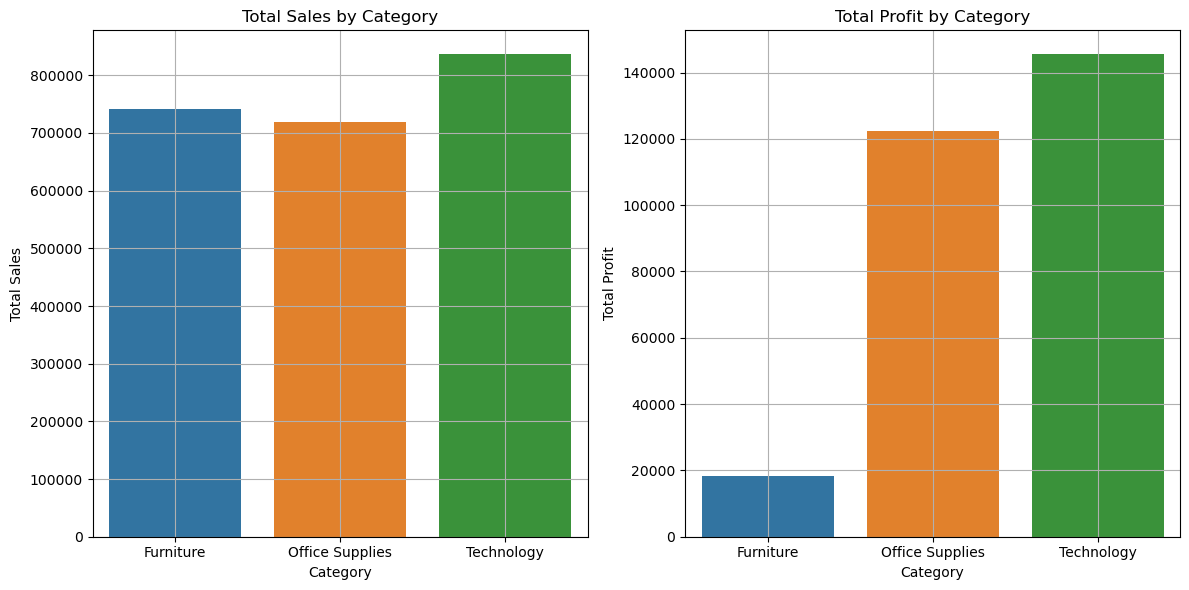

In [14]:
plt.figure(figsize=(12, 6))

# Sales by Category
plt.subplot(1, 2, 1)
sns.barplot(data=data, x='Category', y='Sales', estimator=sum, ci=None)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.grid(True)

# Profit by Category
plt.subplot(1, 2, 2)
sns.barplot(data=data, x='Category', y='Profit', estimator=sum, ci=None)
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.grid(True)

plt.tight_layout()
plt.show()


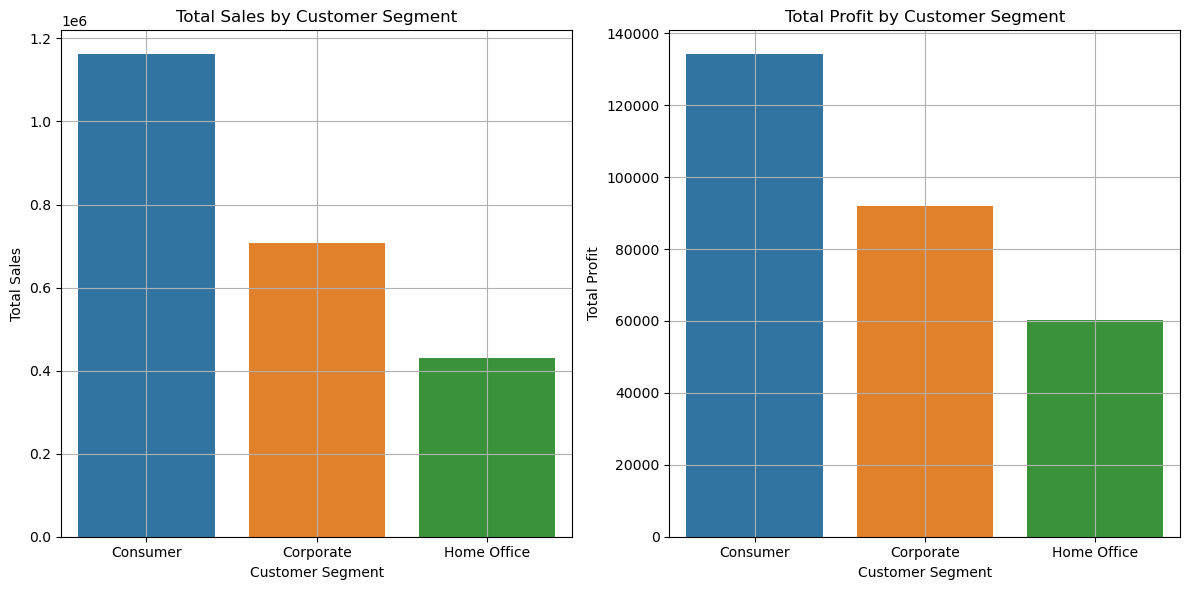

In [15]:
plt.figure(figsize=(12, 6))

# Sales by Customer Segment
plt.subplot(1, 2, 1)
sns.barplot(data=data, x='Segment', y='Sales', estimator=sum, ci=None)
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.grid(True)

# Profit by Customer Segment
plt.subplot(1, 2, 2)
sns.barplot(data=data, x='Segment', y='Profit', estimator=sum, ci=None)
plt.title('Total Profit by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Profit')
plt.grid(True)

plt.tight_layout()
plt.show()

 Product-Level Analysis

Top 10 Products by Sales: The top 10 products that generated the highest sales were identified and visualized.

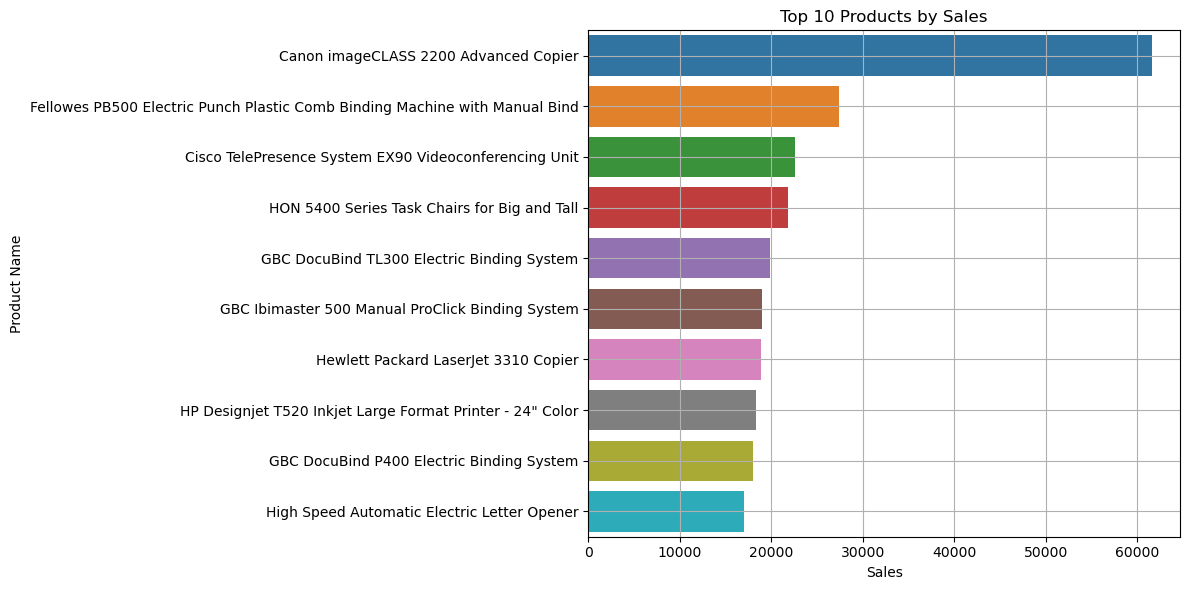

In [16]:
top_products = data.groupby('Product Name').agg({'Sales': 'sum'}).nlargest(10, 'Sales').reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, y='Product Name', x='Sales')
plt.title('Top 10 Products by Sales')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.grid(True)
plt.tight_layout()
plt.show()

Sales Distribution Across Sub-Categories

Analyze how sales are distributed across various sub-categories within the store.

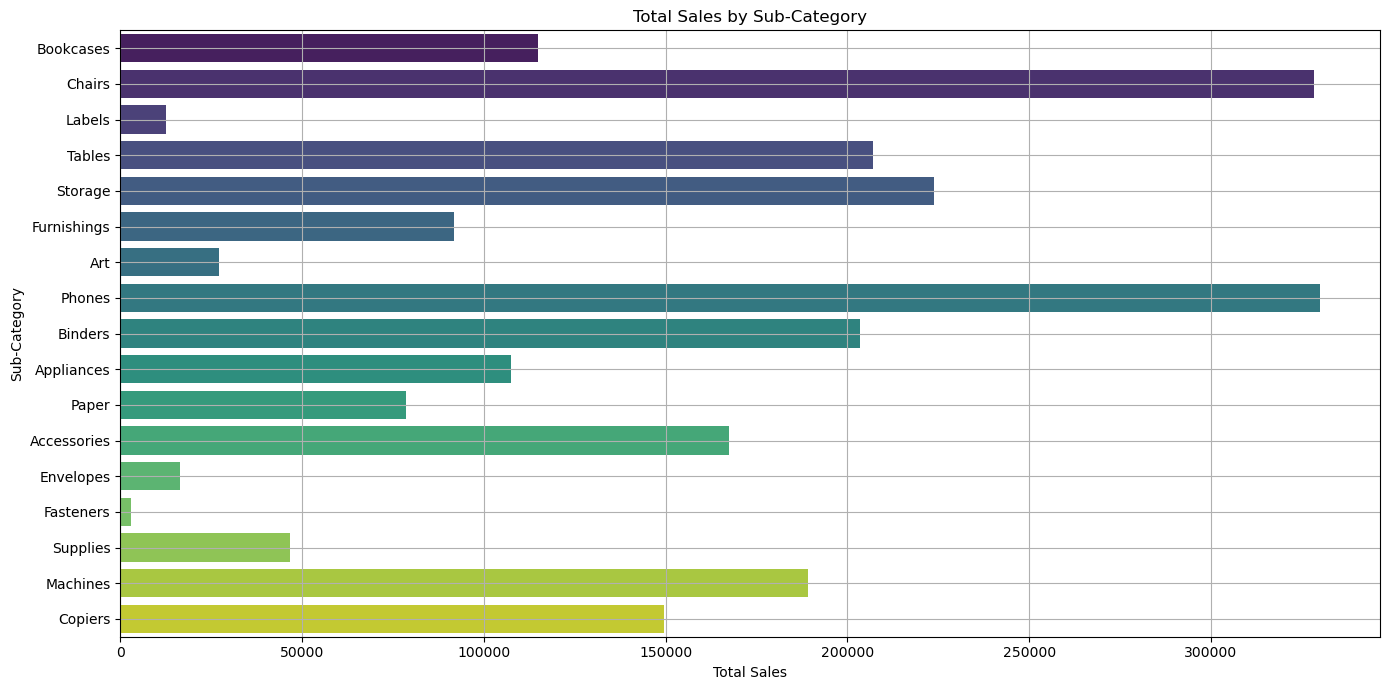

In [17]:
plt.figure(figsize=(14, 7))
sns.barplot(data=data, y='Sub-Category', x='Sales', estimator=sum, ci=None, palette='viridis')
plt.title('Total Sales by Sub-Category')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.grid(True)
plt.tight_layout()
plt.show()

Profit Margin by Category and Sub-Category

Calculate and visualize the profit margin for each category and sub-category.

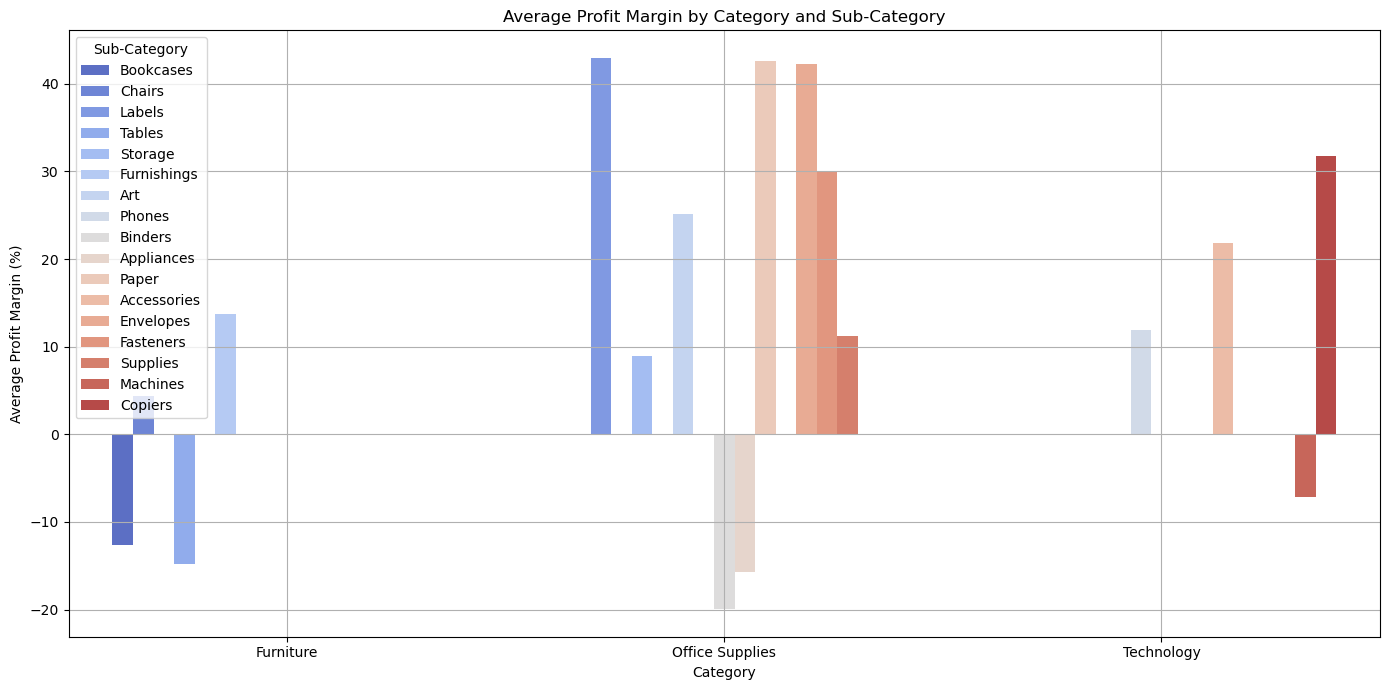

In [18]:
data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100

plt.figure(figsize=(14, 7))
sns.barplot(data=data, x='Category', y='Profit Margin', estimator=np.mean, ci=None, hue='Sub-Category', palette='coolwarm')
plt.title('Average Profit Margin by Category and Sub-Category')
plt.xlabel('Category')
plt.ylabel('Average Profit Margin (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

Correlation Heatmap

Examine the correlation between numerical variables like sales, profit, quantity, and discount.

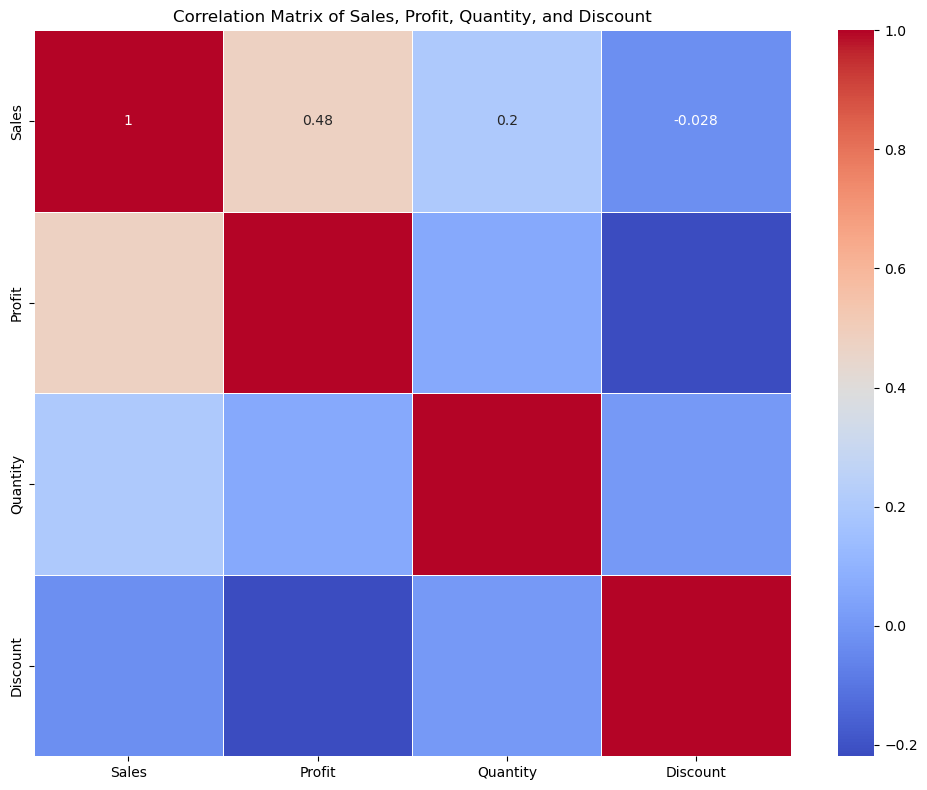

In [19]:
plt.figure(figsize=(10, 8))
corr_matrix = data[['Sales', 'Profit', 'Quantity', 'Discount']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Sales, Profit, Quantity, and Discount')
plt.tight_layout()
plt.show()

Sales and Profit by State

Visualize the distribution of sales and profit across different states.

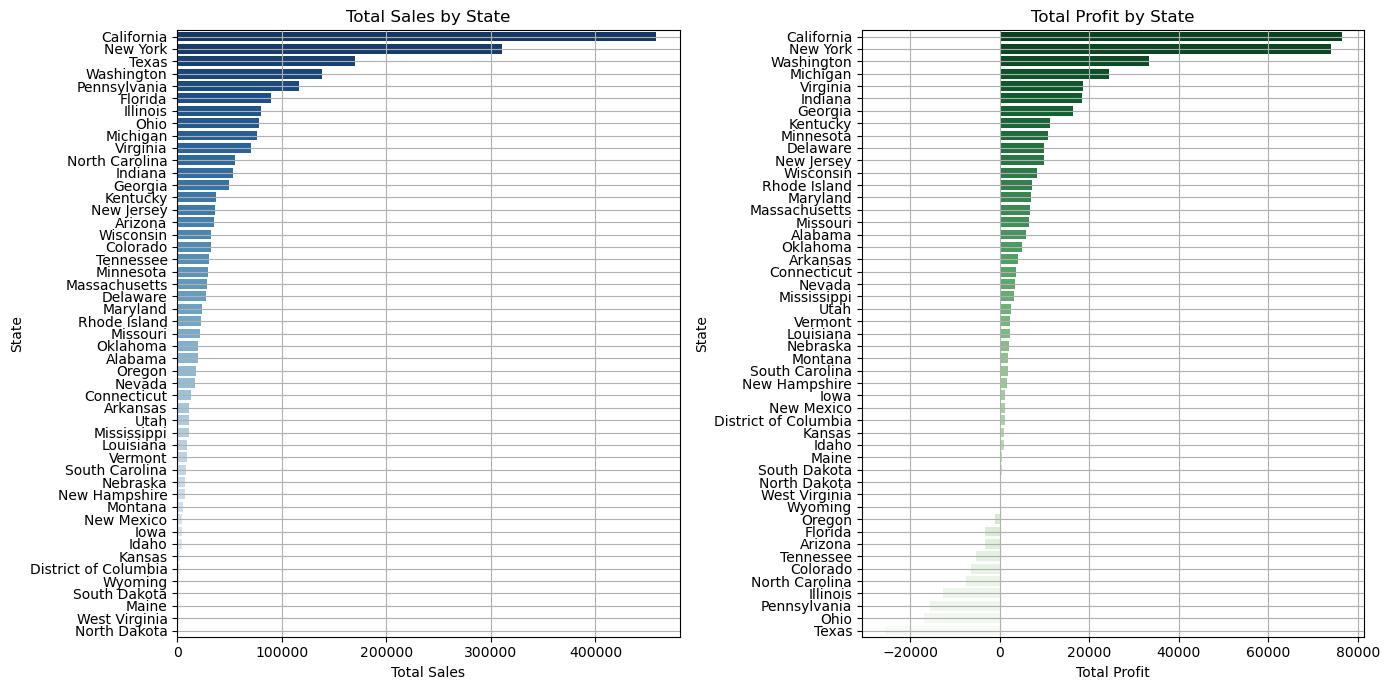

In [20]:
plt.figure(figsize=(14, 7))

# Sales by State
plt.subplot(1, 2, 1)
state_sales = data.groupby('State')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=state_sales.values, y=state_sales.index, palette='Blues_r')
plt.title('Total Sales by State')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.grid(True)

# Profit by State
plt.subplot(1, 2, 2)
state_profit = data.groupby('State')['Profit'].sum().sort_values(ascending=False)
sns.barplot(x=state_profit.values, y=state_profit.index, palette='Greens_r')
plt.title('Total Profit by State')
plt.xlabel('Total Profit')
plt.ylabel('State')
plt.grid(True)

plt.tight_layout()
plt.show()


Discount Impact on Sales and Profit

Explore how discounts affect sales and profit by visualizing the relationship between discount levels and these metrics.

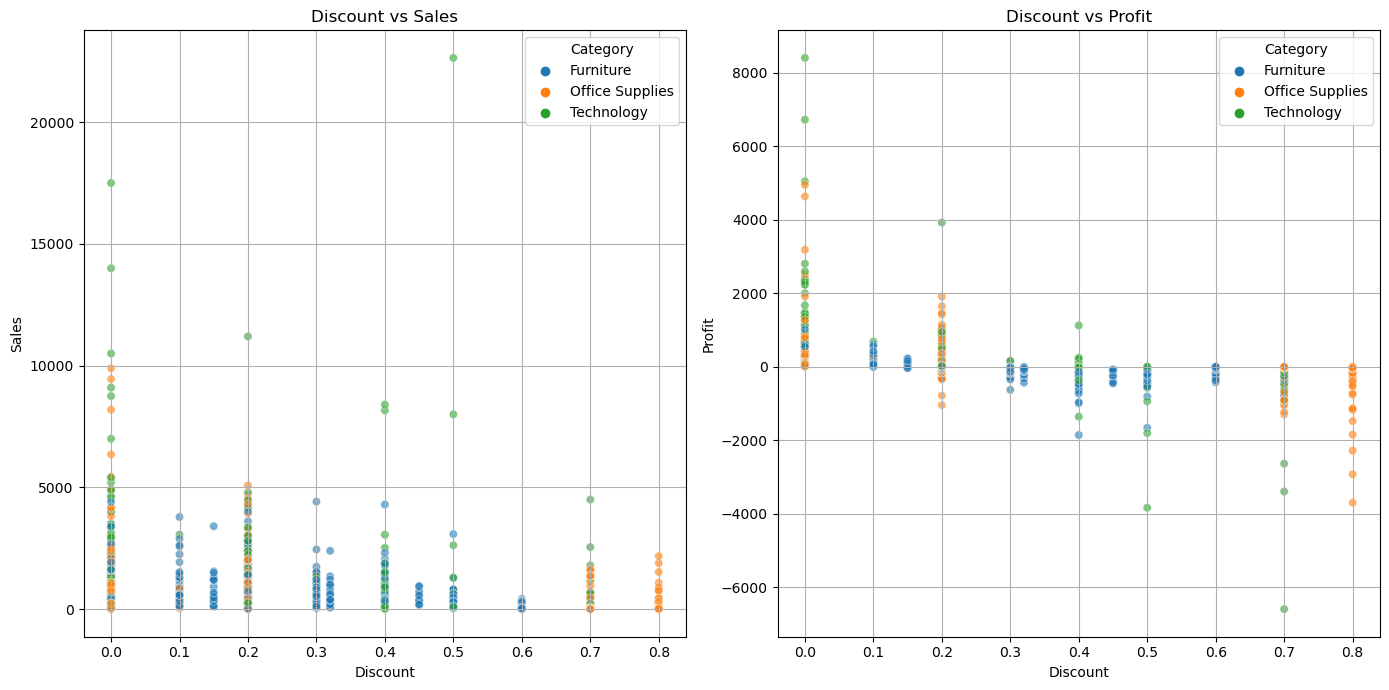

In [21]:
plt.figure(figsize=(14, 7))

# Sales vs Discount
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='Discount', y='Sales', hue='Category', alpha=0.6)
plt.title('Discount vs Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.grid(True)

# Profit vs Discount
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='Discount', y='Profit', hue='Category', alpha=0.6)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)

plt.tight_layout()
plt.show()


 Sales vs Quantity

Analyze the relationship between the quantity of items sold and the total sales, which can provide insights into bulk purchasing behavior.

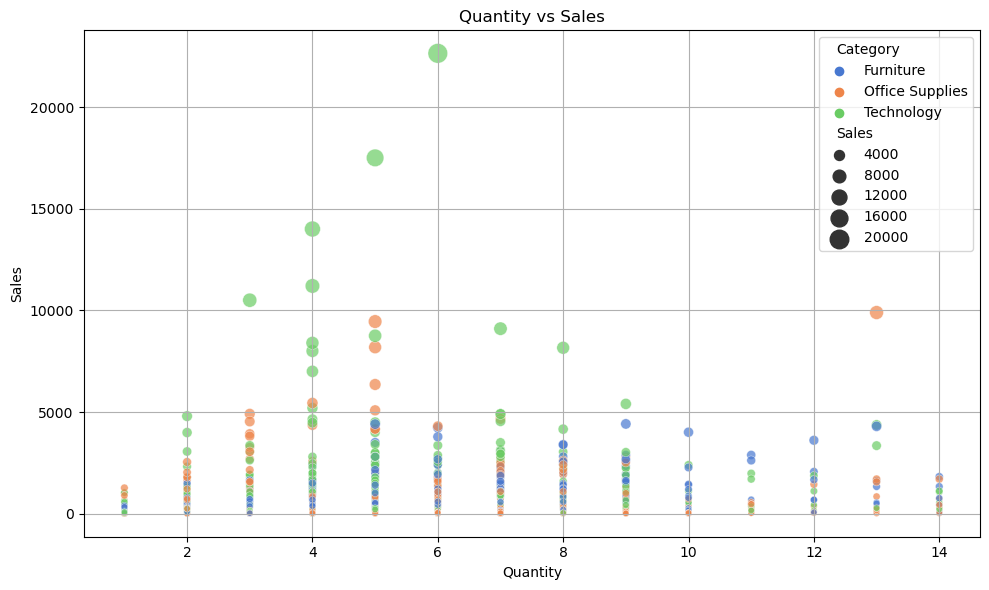

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Quantity', y='Sales', hue='Category', size='Sales', sizes=(20, 200), alpha=0.7, palette='muted')
plt.title('Quantity vs Sales')
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


Advanced Analysis

Profitability by Shipping Mode

Analyze the profitability associated with different shipping modes.

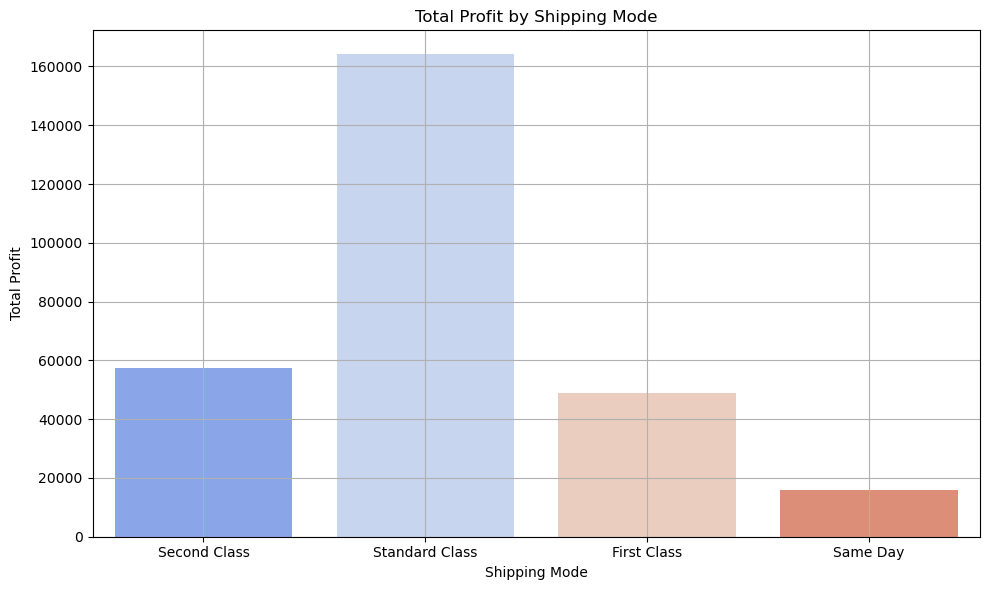

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Ship Mode', y='Profit', estimator=sum, ci=None, palette='coolwarm')
plt.title('Total Profit by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Total Profit')
plt.grid(True)
plt.tight_layout()
plt.show()


 Customer Lifetime Value (CLV) Analysis

Estimate the lifetime value of customers based on their purchase history.

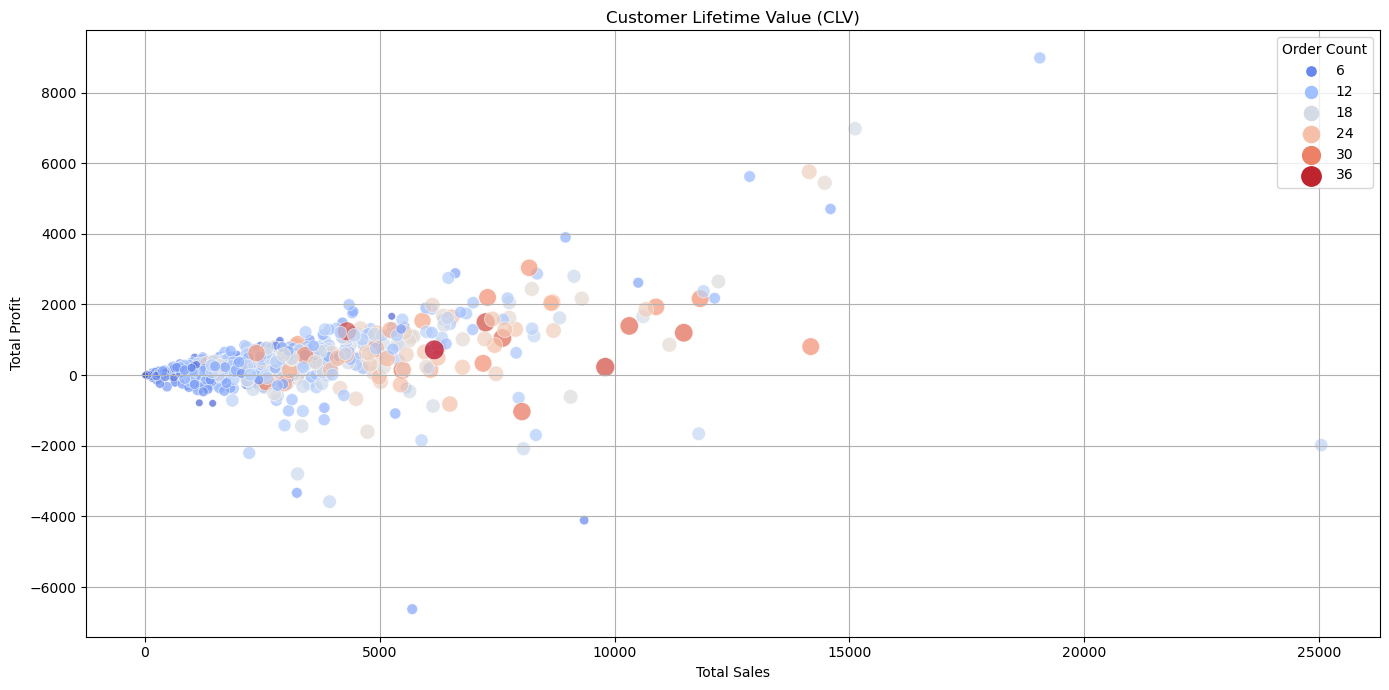

In [24]:
# Group data by Customer ID and calculate CLV (sum of all purchases)
customer_clv = data.groupby('Customer ID').agg({'Sales': 'sum', 'Profit': 'sum', 'Order ID': 'count'}).reset_index()
customer_clv.columns = ['Customer ID', 'Total Sales', 'Total Profit', 'Order Count']

plt.figure(figsize=(14, 7))
sns.scatterplot(data=customer_clv, x='Total Sales', y='Total Profit', size='Order Count', hue='Order Count', sizes=(20, 200), palette='coolwarm', alpha=0.7)
plt.title('Customer Lifetime Value (CLV)')
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.grid(True)
plt.tight_layout()
plt.show()


Conclusion

The Superstore Sales Analysis and Visualization project provided a thorough examination of the store's performance across various dimensions, revealing several key insights:

1.Category and Sub-Category Performance.

The Technology category emerged as the top-performing category in terms of both sales and profit, indicating strong consumer demand for tech products.
Within the Technology category, Phones and Chairs were the standout sub-categories, driving the majority of sales.
Office Supplies also contributed significantly to overall sales, though with lower profit margins compared to Technology.

2.Regional Insights:

The West and East regions were the most profitable, with the West region leading in both total sales and profit.
States like California and New York were particularly strong, contributing heavily to the overall sales and profitability. These states can be targeted for further expansion and marketing efforts.
Conversely, regions like the South showed lower profitability, indicating potential areas for improvement in marketing or inventory strategies.

3.Customer Segment and Profitability:

The Corporate customer segment generated the highest profit margins, while the Consumer segment drove the highest sales volume. This suggests a balanced strategy of targeting both segments could be beneficial.
Home Office customers, though smaller in number, contributed steadily to both sales and profit, making them a valuable segment for niche marketing strategies.

4.Impact of Discounts:

While discounts positively impacted sales volume, there was a noticeable decrease in profit margins, especially in highly discounted categories.
This analysis suggests that while discounting can be an effective sales strategy, it should be carefully managed to avoid eroding profit margins.

5.Shipping Mode Analysis:

Standard Class was the most frequently used shipping mode, and it was also the most profitable, likely due to lower associated shipping costs.
Same Day and Second Class shipping options, while convenient for customers, did not significantly boost profit margins, indicating that premium shipping options should be strategically priced.

6.Customer Lifetime Value (CLV):

High-value customers were identified, particularly those who consistently purchased Technology and Furniture items. These customers are crucial for long-term profitability and should be targeted with personalized marketing campaigns.
The CLV analysis highlighted the importance of repeat customers in driving sales, suggesting that loyalty programs could be effective in increasing customer retention.

Final Recommendations:

1.Targeted Marketing: Focus marketing efforts on the Technology and Office Supplies categories, particularly in the West and East regions, to maximize sales and profitability.
2.Discount Strategy: Refine discount strategies to maintain sales growth without significantly reducing profit margins, possibly by offering discounts selectively on high-margin items.
3.Customer Segmentation: Leverage customer data to create more personalized marketing campaigns, particularly targeting high-value segments such as Corporate and repeat customers.
4.Inventory and Shipping: Optimize inventory levels for top-selling products in high-performing regions and consider strategic pricing for premium shipping options to enhance profitability.

This analysis offers a comprehensive understanding of Superstore's sales dynamics and provides actionable insights that can be leveraged to enhance overall business performance.

